In [21]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [22]:
# import libraries

import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/mount/MyDrive/GANs mit Pytorch/mnist_data/mnist_train.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
import matplotlib.pyplot as plt

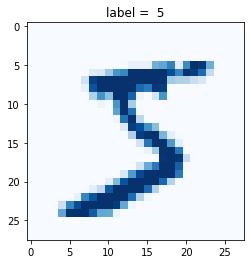

In [8]:
row = 0
data = df.iloc[row]

label = data[0]

img = data[1:].values.reshape(28,28)
plt.title('label =  '+ str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [9]:
import torch
import torch.nn as nn

In [23]:
# classifier class

class Classifier(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, using simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, and update the weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

In [24]:
# dataset class

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # return label, image data tensor and target tensor
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass


In [25]:
mnist_dataset = MnistDataset('/content/mount/MyDrive/GANs mit Pytorch/mnist_data/mnist_train.csv')

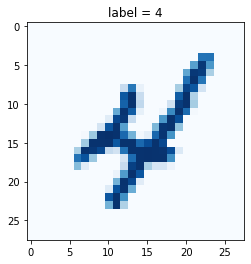

In [26]:
mnist_dataset.plot_image(9)

In [40]:
%%time 
# create neural network

C = Classifier()

# train network on MNIST data set

epochs = 20

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass


training epoch 1 of 20
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 20
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 20
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 20
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
training epoch 5 of 20
counter =  250000
counter =  260000
counter =  270000
counter =  280000
counter =  290000
counter =  300000
training epoch 6 of 20
counter =  310000
counter =  320000
counter =  330000
counter =  340000
counter =  350000
counter =  360000
training epoch 7 of 20
counter =  370000
counter =  380000
counter =  390000
counter =  400000
counter =  410000
counter =  420000
training epoch 8 of 20
counter =  430000
counter =  440000
counter =  450000
counter =  4600

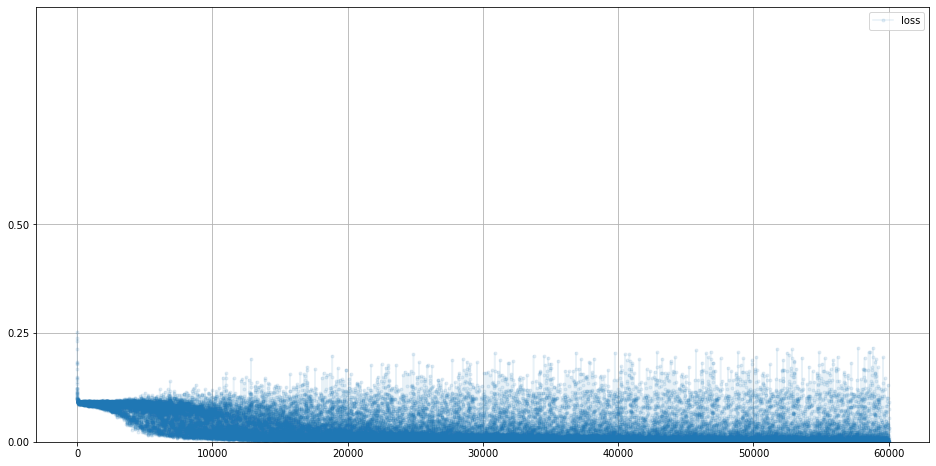

In [34]:
C.plot_progress()

In [29]:
mnist_test_dataset = MnistDataset('/content/mount/MyDrive/GANs mit Pytorch/mnist_data/mnist_test.csv')

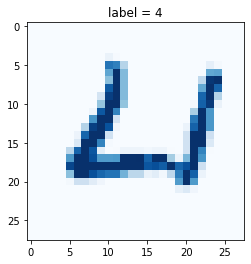

In [36]:
record = 33
mnist_test_dataset.plot_image(record)

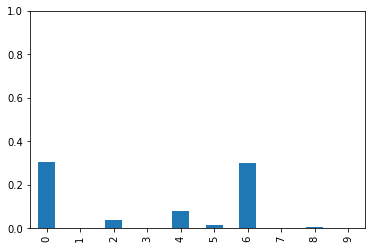

In [37]:
image_data = mnist_test_dataset[record][1]
output = C.forward(image_data)

pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [39]:
score = 0
items = 0

for label, image_data_tensor, target_tensor, in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

9068 10000 0.9068


In [41]:
# with 20 epochs
score = 0
items = 0

for label, image_data_tensor, target_tensor, in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  if (answer.argmax() == label):
    score += 1
    pass
  items += 1

  pass

print(score, items, score/items)

9226 10000 0.9226
